<a href="https://colab.research.google.com/github/Manishavijay06/beachRoverModel/blob/main/pixelateSandSize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving 20grains_contrast.jpg to 20grains_contrast.jpg


In [6]:
import os
for filename in uploaded.keys():
    os.rename(filename, "sand.png")
    print(f"Renamed {filename} to sand.png")

Renamed 20grains_contrast.jpg to sand.png


In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:

sandImg=cv2.imread('sand.png')
#OpenCV hands you beads in Blue-Green-Red order,Matplotlib expects Red-Green-Blue
sandImg=cv2.cvtColor(sandImg,cv2.COLOR_BGR2RGB)

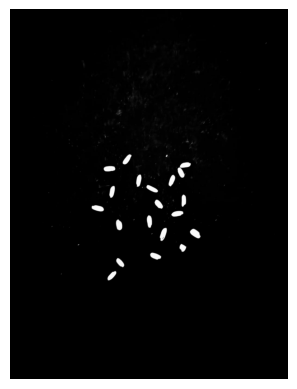

In [9]:
plt.imshow(sandImg)
plt.axis('off')
plt.show()

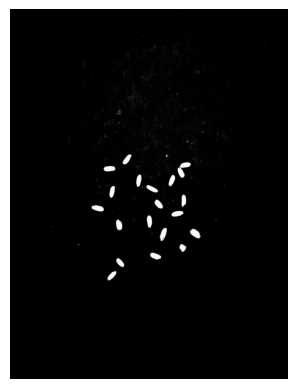

In [10]:
gray=cv2.cvtColor(sandImg,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")  #If you dont specify cmap, Matplotlib defaults to viridis
plt.axis("off")
plt.show()

BLUR TYPES ? WHY GAUSSIAN?

Average Blur – smooths everything equally → edges get lost (grains merge).

Gaussian Blur – weighted average → reduces noise but keeps edges (best balance).

Median Blur – uses median → removes black-white noise, preserves edges well.

Bilateral Blur – smooths flat areas but keeps edges sharp → most accurate, but slow.

 Why Gaussian? → Simple, fast, balances noise removal + edge preservation.

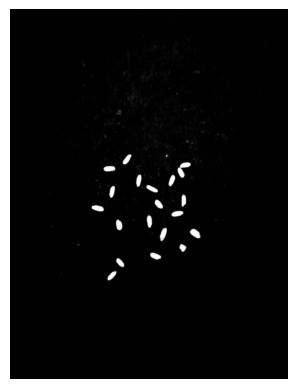

In [11]:
gray_blur=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray_blur,cmap="gray")
plt.axis("off")
plt.show()

If you set σ = 0: So OpenCV auto-calculates σ from the kernel size.

Rule of Thumb:

Smaller kernel = more detail kept.

Larger kernel = more blur, fewer details.

(5x5 Medium kernel → balanced smoothing)

In [12]:
_, otsu = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("sand_otsu.jpg", otsu)



True

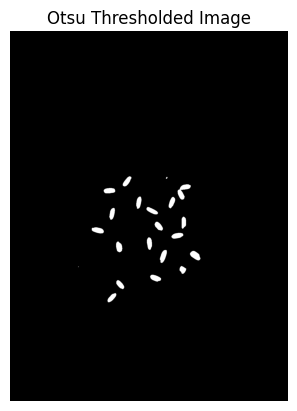

In [13]:
plt.imshow(otsu, cmap='gray')
plt.title("Otsu Thresholded Image")
plt.axis('off')
plt.show()


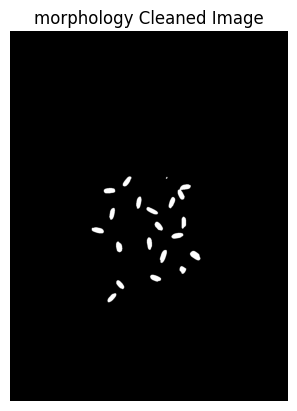

In [14]:
import numpy as np
kernel = np.ones((3,3), np.uint8)

opened = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel, iterations=1)

cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=1)

cv2.imwrite("sand_cleaned.jpg", cleaned)

plt.imshow(cleaned, cmap='gray')
plt.title("morphology Cleaned Image")
plt.axis('off')
plt.show()

Relative Filtering - Right now you don’t have a scale reference (ArUco/ruler).

Grain size in pixels changes with zoom, so fixed thresholds won’t work.

But grains in the same image will have roughly similar sizes (within a range).

So → if a contour is too small or too large compared to the others, it’s an outlier

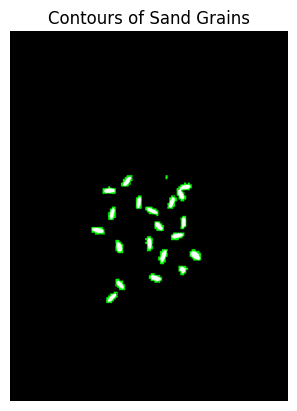

In [15]:
binary = cv2.imread("sand_cleaned.jpg", 0)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

plt.imshow(contour_img)
plt.title("Contours of Sand Grains")
plt.axis("off")
plt.show()


In [16]:
grain_sizes = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1:
        equi_diameter = np.sqrt(4 * area / np.pi)
        grain_sizes.append(equi_diameter)

if len(grain_sizes) > 0:
    median_size = np.median(grain_sizes)
    filtered_sizes = [g for g in grain_sizes if 0.25*median_size <= g <= 10*median_size ]

    if len(filtered_sizes) > 0:
        avg_size = np.mean(filtered_sizes)
        print("Grains detected:", len(filtered_sizes))
        print("Median size (pixels):", median_size)
        print("Average size after filtering (pixels):", avg_size)
    else:
        print("No valid grains after filtering.")
else:
    print("No grains detected.")

Grains detected: 23
Median size (pixels): 2.968023017720192
Average size after filtering (pixels): 2.113126210857239
